In [5]:
import pandas as pd
import numpy as np

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
def convert_dtypes(df):
    df["Дата обращения"] = pd.to_datetime(df["Дата обращения"])
    df[""]

In [7]:
train["Дата обращения"] = pd.to_datetime(train["Дата обращения"])
test["Дата обращения"] = pd.to_datetime(test["Дата обращения"])


In [8]:
train["date+dayofweek"] = train["Дата обращения"].dt.date.astype(str) + "_" + train["Дата обращения"].dt.day_name()

In [9]:
train["Дата обращения"].dt.date.value_counts().sort_index()

Дата обращения
2018-01-19       2
2018-01-25      11
2018-01-26     883
2018-01-27    1001
2018-01-28    1002
2018-01-29      48
2018-01-30      19
2018-01-31     986
2018-02-01    1268
2018-02-02    1135
2018-02-03     822
2018-02-04     898
2018-02-05      67
2018-02-06      29
2018-02-07     801
2018-02-08     778
2018-02-09     859
2018-02-10     898
2018-02-11     918
2018-02-12      43
2018-02-13      34
2018-02-14     791
2018-02-15     778
2018-02-16     732
Name: count, dtype: int64

In [10]:
train["rounded_time"] = train["Дата обращения"].dt.round("3H")

In [11]:
train["Критичность"].value_counts()

Критичность
4-Нет           6775
1-Особая        4717
2-Повышенная    2370
3-Базовая        941
Name: count, dtype: int64

In [12]:
test

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11:00,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13:00,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13:00,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14:00,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14:00,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
6340,21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
6341,21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1
6342,21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,2018-03-09 12:36,2018-02-25 21:16:00,Инцидент,NaN,Самовосстановление,NaN,2018-03-07 09:28,2018-03-14 10:43,2-Повышенная,3-Малое,Система4,Место1


In [46]:
probs_incendent = pd.read_csv("train_prob_obrash.csv")
probs_incendent["start_date_round"] = pd.to_datetime(probs_incendent["start_date_round"])
train = pd.merge(train, probs_incendent, left_on="rounded_time", right_on="start_date_round")
time_series_train = train.groupby(["rounded_time", "Тип обращения итоговый", "Приоритет"]).size().unstack(fill_value=0).unstack(fill_value=0)
time_series_train.columns = [i[0] + "_"+i[1] for i in time_series_train.columns]

In [47]:
import matplotlib.pyplot as plt

In [61]:
median_absolute_deviation = lambda y: np.median(np.abs(y - np.median(y)))
def calculate_anomalies(ts, metric, factor, title="Аномалии", ylabel="Количество обращений"):
    
    df_ = ts.copy()
    df_rolling_stats = (
        df_[metric]
        .rolling(
            window=49,
            center=True,
            min_periods=1,
        )
        .agg({"rolling_mean": "mean", "rolling_std": "std"})
    )
    df_[["rolling_mean", "rolling_std"]] = df_rolling_stats

    df_["is_anomaly"] = np.abs(df_[metric] - df_["rolling_mean"]) > factor * df_["rolling_std"]
    df_["upper"] = df_["rolling_mean"] + factor * df_["rolling_std"]
    df_["lower"] = df_["rolling_mean"] - factor * df_["rolling_std"]
    _, ax = plt.subplots(figsize=[10, 5])
    df_.plot(y=[metric, "rolling_mean"], marker=".", ax=ax)
    df_.plot(
        y=["upper", "lower"], figsize=[10, 5], ax=ax, color="k", alpha=0.2, legend=None
    )
    if df_["is_anomaly"].any():
        df_[metric].loc[df_["is_anomaly"]].plot(
            marker="o", color="r", ax=ax, legend=None, linestyle=""
        )
        
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time")

    return df_[df_["is_anomaly"] == True].index



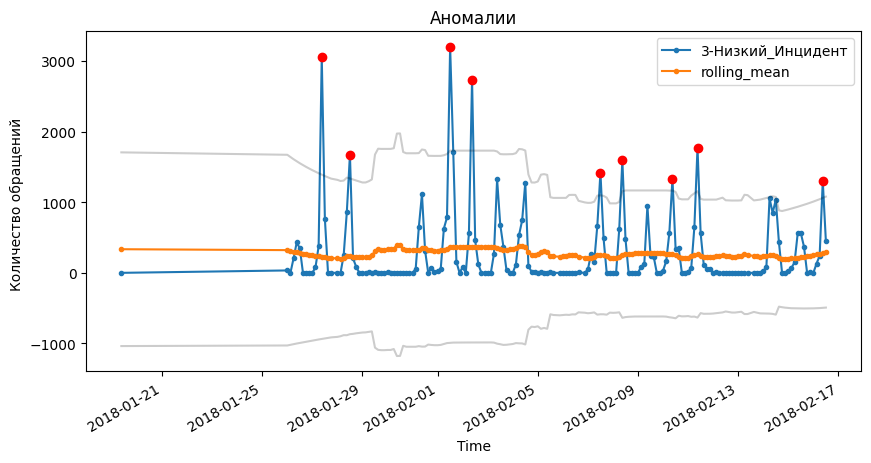

In [49]:
anomaly_dates_low = calculate_anomalies(time_series_train, "3-Низкий_Инцидент", 2)

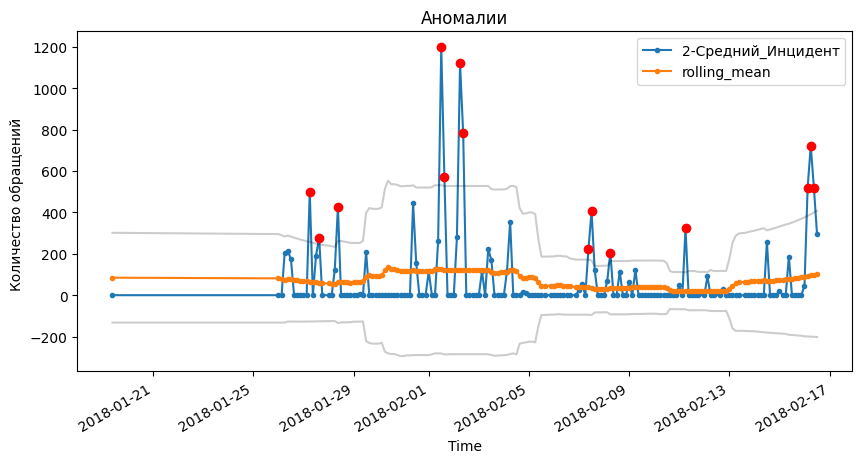

In [50]:
anomaly_dates_medium = calculate_anomalies(time_series_train, "2-Средний_Инцидент", 1.5)

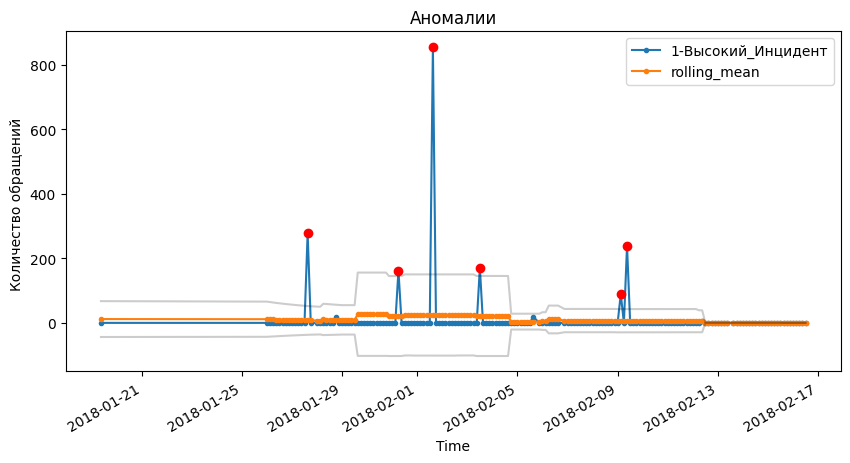

In [51]:
anomaly_dates_high = calculate_anomalies(time_series_train, "1-Высокий_Инцидент", 1)

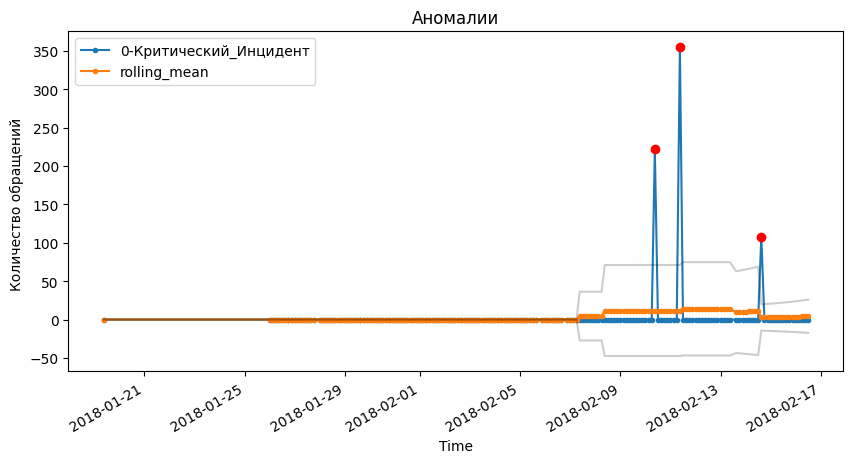

In [52]:
anomaly_dates_critical = calculate_anomalies(time_series_train, "0-Критический_Инцидент", 1)

In [71]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,date+dayofweek,rounded_time,prob,start_date_round
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,8.306628e-01,2018-01-19 09:00:00
1,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,5.378598e-03,2018-01-19 09:00:00
2,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,8.306628e-01,2018-01-19 09:00:00
3,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,5.378598e-03,2018-01-19 09:00:00
4,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,2018-01-25_Thursday,2018-01-26 00:00:00,1.935669e-10,2018-01-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014652,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,1.539394e-07,2018-02-16 12:00:00
3014653,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,6.236045e-14,2018-02-16 12:00:00
3014654,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,2.950615e-09,2018-02-16 12:00:00
3014655,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,1.183335e-06,2018-02-16 12:00:00


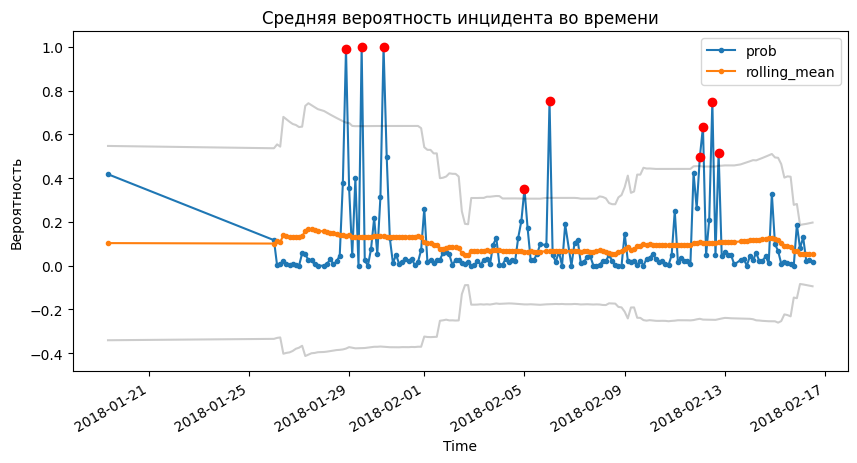

In [67]:
anomaly_dates_probs = calculate_anomalies(train.groupby(by='start_date_round')['prob'].mean().to_frame(), 
                    "prob", 
                    factor=2,
                    title="Средняя вероятность инцидента во времени",
                    ylabel="Вероятность");

In [72]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,date+dayofweek,rounded_time,prob,start_date_round
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,8.306628e-01,2018-01-19 09:00:00
1,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,5.378598e-03,2018-01-19 09:00:00
2,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,8.306628e-01,2018-01-19 09:00:00
3,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,2018-01-19_Friday,2018-01-19 09:00:00,5.378598e-03,2018-01-19 09:00:00
4,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,2018-01-25_Thursday,2018-01-26 00:00:00,1.935669e-10,2018-01-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014652,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,1.539394e-07,2018-02-16 12:00:00
3014653,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,6.236045e-14,2018-02-16 12:00:00
3014654,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,2.950615e-09,2018-02-16 12:00:00
3014655,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-02-17 08:18,2018-02-23 12:29,2-Повышенная,4-Нет влияния,Система101,Место27,2018-02-16_Friday,2018-02-16 12:00:00,1.183335e-06,2018-02-16 12:00:00


In [68]:
anomaly_dates_probs

DatetimeIndex(['2018-01-28 21:00:00', '2018-01-29 12:00:00',
               '2018-01-30 09:00:00', '2018-02-05 00:00:00',
               '2018-02-06 00:00:00', '2018-02-12 00:00:00',
               '2018-02-12 03:00:00', '2018-02-12 12:00:00',
               '2018-02-12 18:00:00'],
              dtype='datetime64[ns]', name='start_date_round', freq=None)

In [69]:
anomaly_dates_critical

DatetimeIndex(['2018-02-10 09:00:00', '2018-02-11 09:00:00',
               '2018-02-14 15:00:00'],
              dtype='datetime64[ns]', name='rounded_time', freq=None)

In [70]:
anomaly_dates_high

DatetimeIndex(['2018-01-27 15:00:00', '2018-01-31 06:00:00',
               '2018-02-01 15:00:00', '2018-02-03 12:00:00',
               '2018-02-09 03:00:00', '2018-02-09 09:00:00'],
              dtype='datetime64[ns]', name='rounded_time', freq=None)